In [177]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [178]:
def bilinear_interpolation(image, new_width, new_height):
    
    width, height = image.size
    img_array = np.array(image)
    resized_img = np.zeros((new_height, new_width, img_array.shape[2]), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            x = (j / new_width) * (width - 1)
            y = (i / new_height) * (height - 1)
            x1, y1 = int(x), int(y)
            x2, y2 = min(x1 + 1, width - 1), min(y1 + 1, height - 1)
            
            r1 = ((x2 - x) * img_array[y1, x1] + (x - x1) * img_array[y1, x2])
            r2 = ((x2 - x) * img_array[y2, x1] + (x - x1) * img_array[y2, x2])
            # heree i calculate the interpolated values horizontally r1 and r2
            # interpolate them vertically to get the final pixel value
            # and thenn assign this value to the corresponding pixel in the resized image
            resized_img[i, j] = ((y2 - y) * r1 + (y - y1) * r2).astype(np.uint8)
    
    return Image.fromarray(resized_img)

def bicubic_interpolation(image, new_width, new_height):
    img_array = np.array(image)
    resized_img = cv2.resize(img_array, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    return Image.fromarray(resized_img)

def compute_error(original, resized):
    original_array = np.array(original)
    resized_array = np.array(resized)
    return np.linalg.norm(original_array - resized_array) / original_array.size

In [179]:
image_paths = ["Images/Pawawo.jpg", "Images/ReiAyanami.jpg", "Images/ReiAyanami2.jpg", "Images/HighResolutionImageWithSky.jpg"]

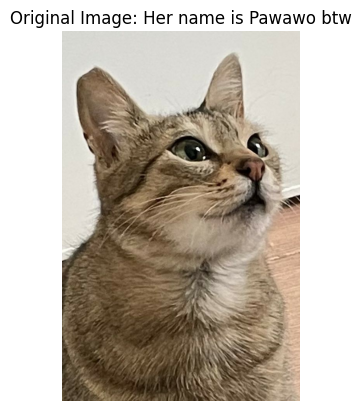

In [180]:
original_image = Image.open(image_paths[0])
original_width, original_height = original_image.size

plt.imshow(original_image)
plt.title("Original Image: Her name is Pawawo btw")
plt.axis("off")
plt.show()

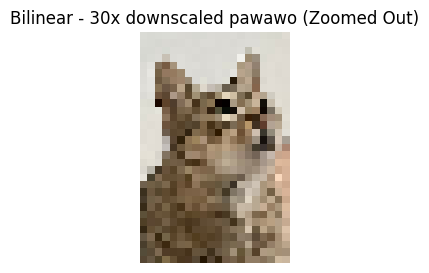

In [181]:
down_width, down_height = original_width // 30, original_height // 30

bilinear_resized = bilinear_interpolation(original_image, down_width, down_height)

plt.figure(figsize=(3, 3))
plt.imshow(bilinear_resized)
plt.title("Bilinear - 30x downscaled pawawo (Zoomed Out)")
plt.axis("off")
plt.show()

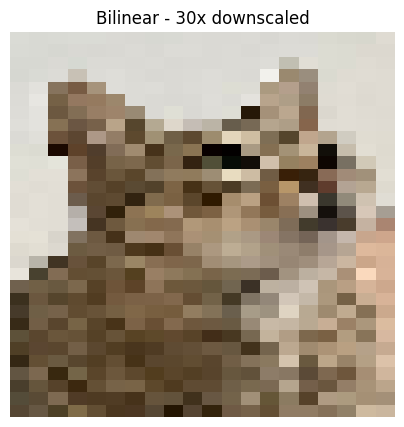

In [182]:
plt.figure(figsize=(5, 5))
plt.imshow(bilinear_resized)
plt.title("Bilinear - 30x downscaled")
plt.axis("off")
plt.gca().set_aspect(down_width / down_height)
plt.show()

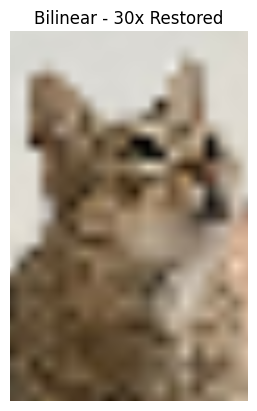

In [183]:
bilinear_restored = bilinear_interpolation(bilinear_resized, original_width, original_height)

plt.imshow(bilinear_restored)
plt.title("Bilinear - 30x Restored")
plt.axis("off")
plt.show()


In [184]:
bilinear_error = compute_error(original_image, bilinear_restored)
print(f"Bilinear interpolation error for that image wass: {bilinear_error:.5f}")


Bilinear interpolation error for that image wass: 0.11386


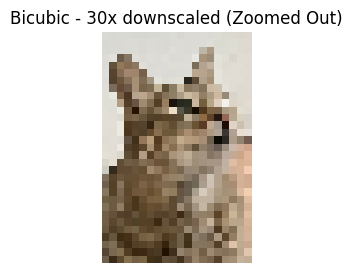

In [185]:
bicubic_resized = bicubic_interpolation(original_image, down_width, down_height)

plt.figure(figsize=(3, 3))
plt.imshow(bicubic_resized)
plt.title("Bicubic - 30x downscaled (Zoomed Out)")
plt.axis("off")
plt.show()

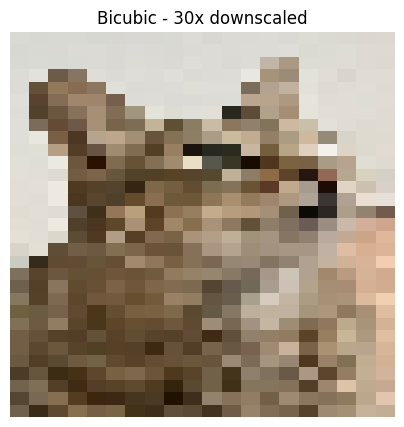

In [186]:
plt.figure(figsize=(5, 5))
plt.imshow(bicubic_resized)
plt.title("Bicubic - 30x downscaled")
plt.axis("off")
plt.gca().set_aspect(down_width / down_height)
plt.show()

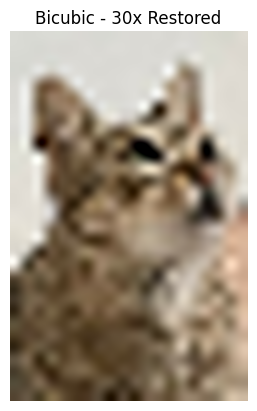

In [187]:
bicubic_restored = bicubic_interpolation(bilinear_resized, original_width, original_height)

plt.imshow(bicubic_restored)
plt.title("Bicubic - 30x Restored")
plt.axis("off")
plt.show()

In [188]:
bicubic_error = compute_error(original_image, bicubic_restored)
print(f"Bicubic interpolation error for that image wass: {bicubic_error:.5f}")

Bicubic interpolation error for that image wass: 0.12090
